<a href="https://colab.research.google.com/github/csun0602/FraudDetection/blob/main/Che_Sun_Bank_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Bank churn prediction: The goal is to predict the potential future loss of bank's customers, based on past data already collected:***

# **Part0: Set up Google data collection environment**

In [ ]:
# Search from Goolge, the code aims at getting the google authorization to allow colab reading from google drive files
# install pydrive to load data
# Using Pydrive method uploading or downloading file from google dirve to colab
#Method sause:https://colab.research.google.com/drive/1-Lm1seq7MVMwgl0DSiEykbRn-PJZwuTC
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)




In [ ]:
#https://drive.google.com/file/d/1slLeSmZXKmiCunNTMYvwsUYKfZc-xdR4/view?usp=sharing
id = "1slLeSmZXKmiCunNTMYvwsUYKfZc-xdR4"
file = drive.CreateFile({'id':id})
file.GetContentFile('bank.data.csv')

# **Part 1: Data Exploration**

Part 1.1: Understand the Raw Dataset

In [ ]:
import pandas as pd
import numpy as np

churn_df = pd.read_csv('bank.data.csv')

In [ ]:
churn_df.head()
#The vital benchmark: "Exited"： 1: churn; 0: not churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#check data information
churn_df.info()
# There are 10,000 data, and all culumn with data, some are int64, some are object:like String etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#Check the unique values for each column, check the number of unique value in each column.
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
# Get target variable:'Exited'
y = churn_df['Exited']

Part 1.2: Understand the features

In [ ]:
# check missing values
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#understand numerical feature
# discrete/continuous
#'CreditScore','Age','Tenure','NumbOfProducts'
#'Balance','EstimatedSalry', then we can find the minimum of estimated salary is too low, that we need to concen it. we need to think the reaon about it,
#what happens on that, is that the teenagers' salary, or it is the hour salary
churn_df[['CreditScore','Age','Tenure','NumOfProducts','Balance','EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [ ]:
# check the feature distribution
#pandas.DataFrame.describe()
#boxplot, displot, countplot
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

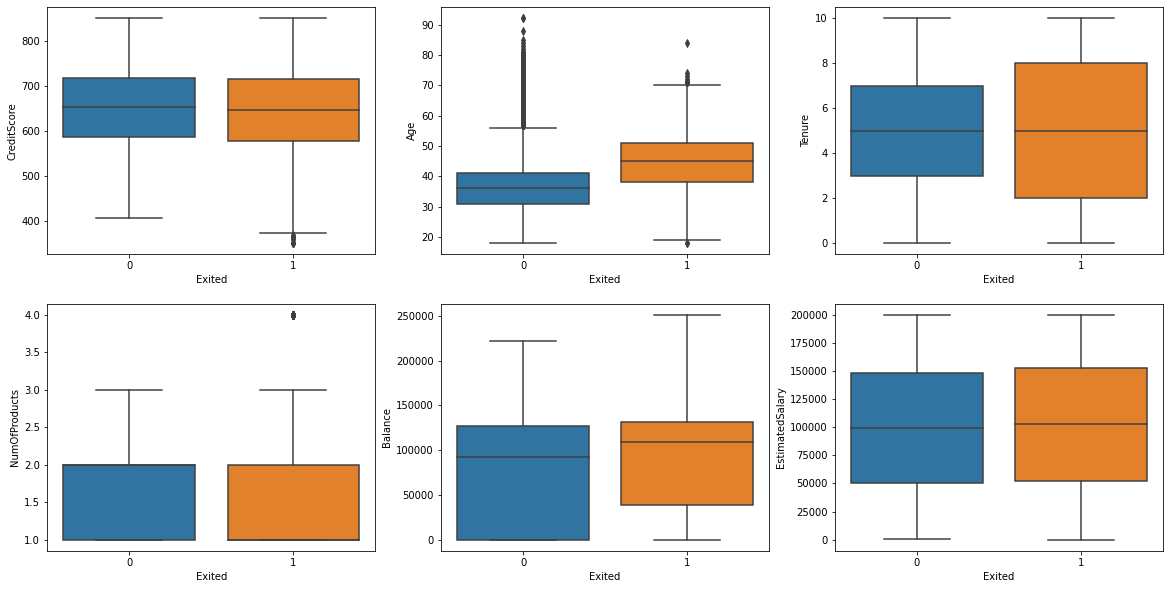

In [ ]:
#boxplot for numerical feature
#By observing, we find that the variable of 'Age' on churn average has bigger difference betweeen churn or not churn, therefore, we concern more on "Age" influence.
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y='Tenure', data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited', y='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y='Balance', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y='EstimatedSalary', data=churn_df, ax=axss[1][2])

<Axes: xlabel='Exited', ylabel='count'>

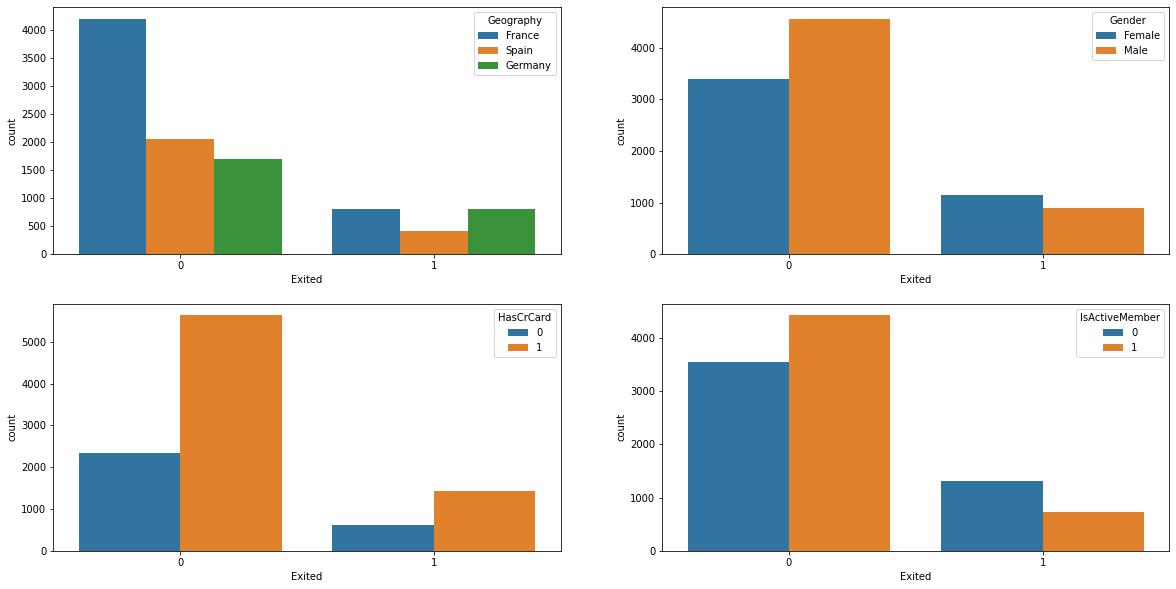

In [ ]:
# understand categorical feature, respectively visualize categorical features' number under churn or not.
# 'Geography', 'Gender'
# 'HasCrCard','IsActiveMember'
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited',hue='Geography', data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited',hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited',hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited',hue='IsActiveMember', data=churn_df, ax=axss[1][1])

# **Part2: Feature Preprocessing**

In [ ]:
# Get feature space by dropping useless feature, Like all of the "Rownumber"and "CustomerId" are always different from each number, there is no meaning to analyse,
# And like "Surname" and "Exited", also do not need to add into Features.
to_drop = ['RowNumber','CustomerId','Surname','Exited']
x = churn_df.drop(to_drop, axis=1)

In [ ]:
# List new data after dropping useless feature
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
#Find the data type for each variables
x.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [ ]:
#Bulling masking, and process filtering
cat_cols = x.columns[x.dtypes == 'object']
num_cols = x.columns[(x.dtypes == 'float64')| (x.dtypes == 'int64')]

In [ ]:
# Get the numerical features
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [ ]:
# Get the categorical features
cat_cols

Index(['Geography', 'Gender'], dtype='object')

Split dataset

In [ ]:
# Split data into training and testing: Stratify
# Example:
# Training(80): 60:y=1; 20:y=0
# Testing(20): 15:y=1; 5: y=0
from sklearn import model_selection

# Reserve 25% for testing
# Stratify sampling:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.25, stratify = y, random_state=1)

print('training data has ' + str(x_train.shape[0]) + ' observation with ' + str(x_train.shape[1]) + ' features')
print('test data has ' + str(x_test.shape[0]) + ' observation with ' + str(x_test.shape[1]) + ' features')

training data has 7500 observation with 10 features
test data has 2500 observation with 10 features


# Exterme case:
  1. testing: 2000 '1' + 500 '0'
  2. training: 7500 '0'

with stratified sampling:

  1. testing: 2000 '0' + 500 '1'
  2. training: 6000 '0' + 1500 '1'
  

In [ ]:
# List the categorical features again
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7971,633,Spain,Male,42,10,0.00,1,0,1,79408.17
9152,708,Germany,Female,23,4,71433.08,1,1,0,103697.57
6732,548,France,Female,37,9,0.00,2,0,0,98029.58
902,645,France,Female,48,7,90612.34,1,1,1,149139.13
2996,729,Spain,Female,45,7,91091.06,2,1,0,71133.12


In [ ]:
# One hot encoding methof: transfer categorical data to numerical data
from sklearn.preprocessing import OneHotEncoder

# Transform Geographic: 3 different geographic value to numerical value into 3 different columns.
def OneHotEncoding(df, enc, categories):
    transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names_out(categories))
    return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)
#
categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(x_train[categories])

x_train = OneHotEncoding(x_train, enc_ohe, categories)
x_test = OneHotEncoding(x_test, enc_ohe, categories)



In [ ]:
# Get the new features table after transforming "Geographic" feature
x_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,Male,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,Female,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,Female,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,Female,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,Female,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


In [ ]:
# Same operation on "Gender", transform "Male" and "Female" to numerical feature
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(x_train[categories])

x_train[categories] = enc_oe.transform(x_train[categories])
x_test[categories] = enc_oe.transform(x_test[categories])

In [ ]:
x_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,1.0,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,0.0,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,0.0,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,0.0,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,0.0,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


Standzrdize/ Normalize Data

In [ ]:
# To avoid the impact of data differences on the model
# Scale the data, using standardization

# Standarization (x-mean)/std
# Normalization (x-x_min)/(x_max-x_min) -> [0,1]

# Use training data to train the standarscaler to get mean and Std
# Apply mean and std. to both training and testing data.
# fit_transform does the training and applying, transform only does applying.
# Because we can't use any information from test, and we need to do the same modification
# to testing dtat as well as train data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train[num_cols])
x_train[num_cols] = scaler.transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])


In [ ]:
x_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.172985,1.0,0.289202,1.731199,-1.218916,-0.912769,-1.542199,0.968496,-0.352044,0.0,0.0,1.0
1,0.602407,0.0,-1.509319,-0.341156,-0.076977,-0.912769,0.648425,-1.032529,0.072315,0.0,1.0,0.0
2,-1.051762,0.0,-0.184093,1.385806,-1.218916,0.796109,-1.542199,-1.032529,-0.026711,1.0,0.0,0.0
3,-0.048922,0.0,0.857156,0.695022,0.229625,-0.912769,0.648425,0.968496,0.866221,1.0,0.0,0.0
4,0.819517,0.0,0.573179,0.695022,0.237278,0.796109,0.648425,-1.032529,-0.496617,0.0,0.0,1.0


# Part 3: Model Training and Result Evaluation

**Part 3.1: Model Training**

In [ ]:
# title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Introduce "Logistic Regression"/ "KNN"/ "Random Forest" 3 supervised classifier
# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [ ]:
# Train the Model
classifier_logistic.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Prediction of test data
classifier_logistic.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Accuracy of the test data
# Comepare the trainnig data with standard data, we can find, approximately 80 data can be explained out of the 100 data model
classifier_logistic.score(x_test, y_test)

0.8088

**Extra: Part 3.2 : Use Grid Search to Find Optimal Hyperparameters**

In [ ]:
# Loss/cost function ---> (wx + b -y)^2 + λ *|w| ---> λ is a hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results
def print_grid_search_metrics(gs):
  print ("Best score:" + str(gs.best_score_))
  print ("Best parameter set:")
  best_parameters = gs.best_params_
  for param_name in sorted(best_parameters.keys()):
    print(param_name + ':' + str(best_parameters[param_name]))

# Part 3.2.1: Find Optiomal Hyperparameter - LogisticRegression:

In [ ]:
# Plssible hyperparameter options for logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the 1/Lambda value(weight) for L1 and L2
# solver: algorithm to find the weights that minimize the cost function
parameters = {
    'penalty':('l2','l1'),
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver = 'liblinear'),parameters, cv=5)
Grid_LR.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l2', 'l1')})

In [ ]:
# the best hyperparamter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)

Best score:0.8125333333333333
Best parameter set:
C:1
penalty:l1


In [ ]:
# best model
best_LR_model = Grid_LR.best_estimator_

In [ ]:
best_LR_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# The accuracy of test data by logistic model: 0.808, which is higher than previous prediction
best_LR_model.score(x_test, y_test)

0.8092

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


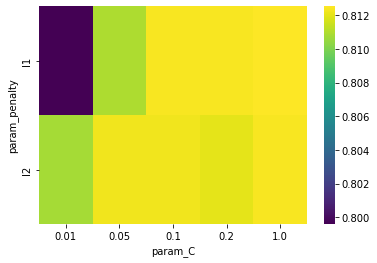

In [ ]:
# Visualization: Looking for the hyperparameter, which can be adjusted to improve the accuracy at most
# From the map, we can find when the parameter c=1(l1), the prediction is most accurate.
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty',columns='param_C', values='mean_test_score')
            )
_ = sns.heatmap(res, cmap = 'viridis')

# Part 3.2.2: Find Optional Hyperparameters: KNN





In [ ]:
# Possible hyperparameter options for KNN
# Choose k
parameters = {'n_neighbors':[1,3,5,7,9]}

Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [ ]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score:0.8433333333333334
Best parameter set:
n_neighbors:9


In [ ]:
best_KNN_model = Grid_KNN.best_estimator_

In [ ]:
best_KNN_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Get the KNN model test accuracy, which is higher than the that in logistic model
best_KNN_model.score(x_test, y_test)

0.8428

# Part 3.2.3: Find Optimal Hyperparameters: Random Forest

In [ ]:
# Possible hyperparamenter options for random forest
# Choose the number of trees
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth' : [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [ ]:
# best number of trees
print_grid_search_metrics(Grid_RF)

Best score:0.8656
Best parameter set:
max_depth:10
n_estimators:100


In [ ]:
# Best random forest
best_RF_model = Grid_RF.best_estimator_

In [ ]:
best_RF_model

RandomForestClassifier(max_depth=10)

In [ ]:
best_RF_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Get the random forest model test accuracy, which is the highest compare with any other two models.
best_RF_model.score(x_test, y_test)

0.8608

# Part 3.3: Model Evaluation - Confusion Matrix(Precision, Recall, Accuracy)

class of interest as positiove
TP: correctly labeled real churn

Precision(PPV, position predictive value):tp/(tp+fp); Total number of true predictive churn dividend by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users.

Recall(sensitivity, hit rate, true positive rate): tp/(tp+fn) Predict most positive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Calculateaccuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
  tn = cm[0] [0]
  fp = cm[0] [1]
  fn = cm[1] [0]
  tp = cm[1] [1]
  accuracy = (tp + tn) / (tp + fp + fn + tn + 0.0)
  precision = tp / (tp + fp + 0.0)
  recall = tp/ (tp+fn+0.0)
  print (classifier)
  print ("Accuracy is: " + str(accuracy))
  print ("prediction is: " + str(precision))
  print ("recall is: " + str(recall))
  print ()

# Print out confusion matrices
def draw_confusion_matrices(confusion_matrices):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
      classifier, cm = cm[0], cm[1]
      cal_evaluation(classifier, cm)


In [ ]:
# Confusion_matrix, accuracy, precision and recall for random forest and logistic regression

confusion_matrices = [
    ("Logistic regression", confusion_matrix(y_test,best_LR_model.predict(x_test))),
    ("K nearest neighbor", confusion_matrix(y_test,best_KNN_model.predict(x_test))),
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(x_test)))
]


draw_confusion_matrices(confusion_matrices)


Logistic regression
Accuracy is: 0.8092
prediction is: 0.5963855421686747
recall is: 0.1944990176817289

K nearest neighbor
Accuracy is: 0.8428
prediction is: 0.7283464566929134
recall is: 0.36345776031434185

Random Forest
Accuracy is: 0.8608
prediction is: 0.8037735849056604
recall is: 0.41846758349705304



# Part 3.4: Model Evaluation - ROC & AUC

Random forest Classifier, K Neighbors Classifier and Logistic Rgression have predic_proba() function

**Part 3.4.1: ROC of LR Model**

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(x_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

In [ ]:
best_LR_model.predict_proba(x_test)

array([[0.8243711 , 0.1756289 ],
       [0.93171765, 0.06828235],
       [0.85518296, 0.14481704],
       ...,
       [0.71451469, 0.28548531],
       [0.89278954, 0.10721046],
       [0.85558422, 0.14441578]])

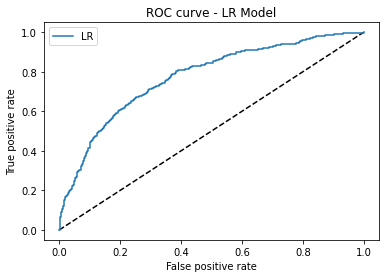

In [ ]:
# ROC Curve
plt.figure(1)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [ ]:
# AUC score
metrics.auc(fpr_lr, tpr_lr)

0.7722107045555687

 **Part 3.4.2: ROC of RF Model**

In [ ]:
# Use predict_proba to get the probability results of random Forest
y_pred_rf = best_RF_model.predict_proba(x_test)[:,1]
fpr_rf, tpr_rf,_ = roc_curve(y_test, y_pred_rf)


In [ ]:
best_RF_model.predict_proba(x_test)

array([[0.72613828, 0.27386172],
       [0.93591796, 0.06408204],
       [0.7515998 , 0.2484002 ],
       ...,
       [0.85813893, 0.14186107],
       [0.93559851, 0.06440149],
       [0.89791381, 0.10208619]])

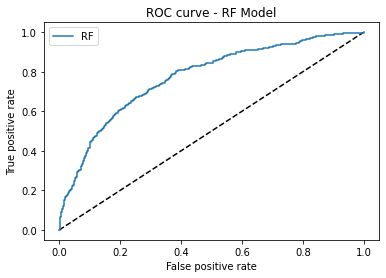

In [ ]:
# ROC Curve of Random Forest result
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF Model')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.847265543669499

# Part 4: Model Extra Functionality

Part 4.1: Logistic Regression Model

The correlated features that we are interested in

In [ ]:
x_with_corr = x.copy()

x_with_corr = OneHotEncoding(x_with_corr, enc_ohe, ['Geography'])
x_with_corr['Gender'] = enc_oe.transform(x_with_corr[['Gender']])
x_with_corr['SalaryInRMB'] = x_with_corr['EstimatedSalary'] * 6.4
x_with_corr.head()

# 6.4 is the exchange rate between RMB an US dollar
# By observing the table, we can find that there is a strong correlation between 'SalaryInRMB' and 'EstimatedSalary' with almost 6.4 devision ratio.
# This is since, when we use L1 hyperparameter, there will be strong correlation between feature

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,SalaryInRMB
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,648632.832
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,720272.512
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,729162.048
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,600490.432
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,506138.240


In [ ]:
# Add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
x_l1 = scaler.fit_transform(x_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.04, solver='liblinear')
LRmodel_l1.fit(x_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print("Logistic Regression (L1) Coefficients")
for ind in range(x_with_corr.shape[1]):
  print ("{0} : {1}".format(x_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]],4)))

# from the below, we can find L1 coefficients for "EstimatedSalary", "SalaryInRMB" and Geography_Spain are really similar, therefore, they have strong correlation.

Logistic Regression (L1) Coefficients
Age : 0.7307
IsActiveMember : -0.5046
Geography_Germany : 0.3121
Gender : -0.2409
Balance : 0.151
CreditScore : -0.0457
NumOfProducts : -0.0439
Tenure : -0.0271
EstimatedSalary : 0.0092
Geography_France : -0.0043
HasCrCard : -0.0022
SalaryInRMB : 0.0
Geography_Spain : 0.0


In [ ]:
# Add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
x_l2 = scaler.fit_transform(x_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(x_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print("Logistic Regression (L2) Coefficients")
for ind in range(x_with_corr.shape[1]):
  print ("{0} : {1}".format(x_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]],4)))

# Base on L1 coefficient, we still find that the L2 coefficient of "SalaryInRMB" and "EstimatedSalary" are same, this should arouse our notice

Logistic Regression (L2) Coefficients
Age : 0.751
IsActiveMember : -0.5272
Gender : -0.2591
Geography_Germany : 0.2279
Balance : 0.162
Geography_France : -0.1207
Geography_Spain : -0.089
CreditScore : -0.0637
NumOfProducts : -0.0586
Tenure : -0.0452
HasCrCard : -0.0199
SalaryInRMB : 0.0137
EstimatedSalary : 0.0137


**Part 4.2: Random Forest Model - Feature Importance Discussion**

In [ ]:
x_RF = x.copy()

x_RF = OneHotEncoding(x_RF, enc_ohe, ['Geography'])
x_RF['Gender'] = enc_oe.transform(x_RF[['Gender']])

x_RF.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [ ]:
# Check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(x_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(x.shape[1]):
  print("{0} : {1}".format(x_RF.columns[indices[ind]],round(importances[indices[ind]],4)))

#From the below list, we can find "Age" has biggest coefficient, that with 1 age older, there will be apporximately 23.84% customer churn, holding other
#features constant.

Feature importance ranking by Random Forest Model:
Age : 0.2384
EstimatedSalary : 0.1469
CreditScore : 0.1437
Balance : 0.1408
NumOfProducts : 0.1331
Tenure : 0.0814
IsActiveMember : 0.0404
Geography_Germany : 0.0194
HasCrCard : 0.0186
Gender : 0.0176
